<a href="https://colab.research.google.com/github/ShriyaGandotra/Intro-Machine-Learning/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/Machine Learning/Assignment 6')

Mounted at /content/gdrive


Epoch [500/5000], Loss: 0.0156, Val Loss: 0.0287
Epoch [1000/5000], Loss: 0.0134, Val Loss: 0.0254
Epoch [1500/5000], Loss: 0.0119, Val Loss: 0.0229
Epoch [2000/5000], Loss: 0.0108, Val Loss: 0.0210
Epoch [2500/5000], Loss: 0.0100, Val Loss: 0.0196
Epoch [3000/5000], Loss: 0.0095, Val Loss: 0.0185
Epoch [3500/5000], Loss: 0.0091, Val Loss: 0.0176
Epoch [4000/5000], Loss: 0.0088, Val Loss: 0.0170
Epoch [4500/5000], Loss: 0.0086, Val Loss: 0.0165
Epoch [5000/5000], Loss: 0.0084, Val Loss: 0.0160




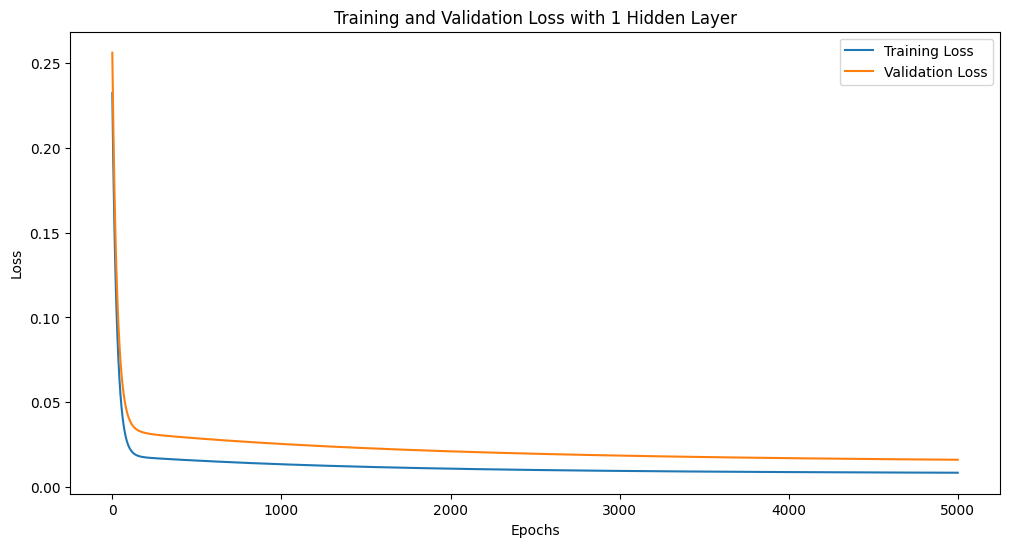

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Housing.csv')

# Convert categorical variables to binary
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[varlist] = data[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Select features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = data['price']

# Standardize the input features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize the output (price)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Convert DataFrame to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32).unsqueeze(1)

seed = 42
torch.manual_seed(seed)

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=seed)

# Define the neural network using Sequential
input_size = X.shape[1]
hidden_size = 32
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.Sigmoid(),
    nn.Linear(hidden_size, 1)
)

# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
n_epochs = 5000
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    # Forward pass and loss computation
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    train_losses.append(loss.item())

    # Zero gradients, backward pass, and weight update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = loss_fn(y_val_pred, y_val)
        val_losses.append(val_loss.item())

    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')


# Plotting the training and validation losses
plt.figure(figsize=(12, 6))
print('\n')
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss with 1 Hidden Layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch [500/5000], Loss: 0.0230, Val Loss: 0.0384
Epoch [1000/5000], Loss: 0.0230, Val Loss: 0.0383
Epoch [1500/5000], Loss: 0.0230, Val Loss: 0.0383
Epoch [2000/5000], Loss: 0.0230, Val Loss: 0.0383
Epoch [2500/5000], Loss: 0.0230, Val Loss: 0.0383
Epoch [3000/5000], Loss: 0.0230, Val Loss: 0.0383
Epoch [3500/5000], Loss: 0.0230, Val Loss: 0.0383
Epoch [4000/5000], Loss: 0.0230, Val Loss: 0.0382
Epoch [4500/5000], Loss: 0.0230, Val Loss: 0.0382
Epoch [5000/5000], Loss: 0.0230, Val Loss: 0.0382




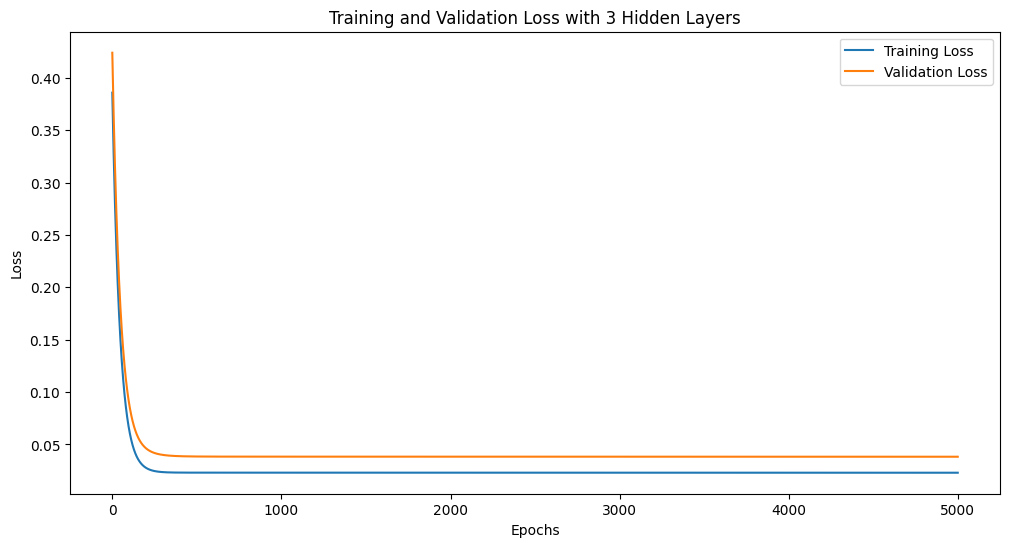

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Housing.csv')

# Convert categorical variables to binary
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[varlist] = data[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Select features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = data['price']

# Standardize the input features
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Normalize the output (price)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Convert DataFrame to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_scaled, dtype=torch.float32).unsqueeze(1)

seed = 42
torch.manual_seed(seed)

# Splitting the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=seed)

# Redesign the model with additional hidden layers
input_size = X.shape[1]
hidden_sizes = [32, 64, 16]  # Sizes of the hidden layers
model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.Sigmoid(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.Sigmoid(),
    nn.Linear(hidden_sizes[1], hidden_sizes[2]),
    nn.Sigmoid(),
    nn.Linear(hidden_sizes[2], 1)

)

# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
n_epochs = 5000
train_losses = []
val_losses = []
for epoch in range(n_epochs):
    # Forward pass and loss computation
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    train_losses.append(loss.item())

    # Zero gradients, backward pass, and weight update
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation loss
    with torch.no_grad():
        y_val_pred = model(X_val)
        val_loss = loss_fn(y_val_pred, y_val)
        val_losses.append(val_loss.item())

    if (epoch+1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, /n')

# Plotting the training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss with 3 Hidden Layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


100%|██████████| 170498071/170498071 [00:03<00:00, 43728819.79it/s]


Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/
Files already downloaded and verified
Epoch: 0, Loss: 1.696575
Epoch: 1, Loss: 1.731140
Epoch: 2, Loss: 2.021680
Epoch: 3, Loss: 1.395516
Epoch: 4, Loss: 1.613599
Epoch: 5, Loss: 1.263750
Epoch: 6, Loss: 1.544210
Epoch: 7, Loss: 1.207570
Epoch: 8, Loss: 1.010326
Epoch: 9, Loss: 1.546973
Epoch: 10, Loss: 1.174816
Epoch: 11, Loss: 1.852602
Epoch: 12, Loss: 1.558749
Epoch: 13, Loss: 0.971556
Epoch: 14, Loss: 0.933729
Epoch: 15, Loss: 0.747928
Epoch: 16, Loss: 1.282498
Epoch: 17, Loss: 0.877630
Epoch: 18, Loss: 1.017257
Epoch: 19, Loss: 1.445526
Epoch: 20, Loss: 0.750538
Epoch: 21, Loss: 0.905620
Epoch: 22, Loss: 1.034672
Epoch: 23, Loss: 1.374464
Epoch: 24, Loss: 1.230204
Epoch: 25, Loss: 0.958189
Epoch: 26, Loss: 0.413091
Epoch: 27, Loss: 0.714622
Epoch: 28, Loss: 1.088100
Epoch: 29, Loss: 0.966039
Epoch: 30, Loss: 0.988381
Epoch: 31, Loss: 0.487836
Epoch: 32, Loss: 0.759863
Epoch: 33, Loss: 0.48463

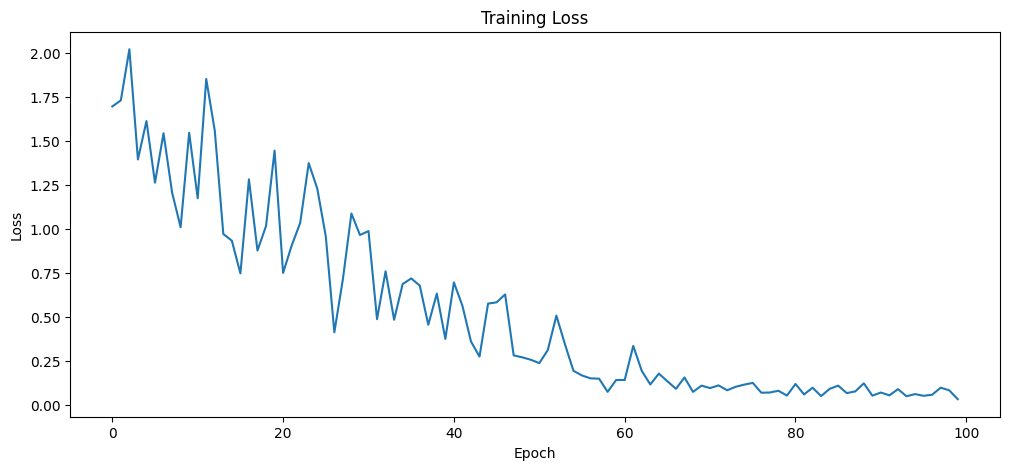

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import time

# Data loading
data_path = '../data-unversioned/p1ch7/'
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
])

cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)


# Neural Network
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 10),
    nn.LogSoftmax(dim=1)
)

# Training
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

training_losses = []
training_times = []

Training_start_time = time.time()

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    training_losses.append(float(loss))

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Training_end_time = time.time()

Total_time = Training_end_time - Training_start_time
print("Total training time: %fs" % Total_time)

# Training Accuracy
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Training Accuracy: %f" % (correct / total))


# Validation Accuracy
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Validation Accuracy: %f" % (correct / total))

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(training_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


100%|██████████| 170498071/170498071 [00:03<00:00, 43345558.22it/s]


Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7/
Files already downloaded and verified
Epoch: 0, Loss: 1.801598
Epoch: 1, Loss: 1.652419
Epoch: 2, Loss: 1.793656
Epoch: 3, Loss: 1.939327
Epoch: 4, Loss: 1.692731
Epoch: 5, Loss: 1.426989
Epoch: 6, Loss: 1.308416
Epoch: 7, Loss: 1.526914
Epoch: 8, Loss: 1.327045
Epoch: 9, Loss: 1.176107
Epoch: 10, Loss: 1.373977
Epoch: 11, Loss: 1.406513
Epoch: 12, Loss: 1.377531
Epoch: 13, Loss: 1.050883
Epoch: 14, Loss: 1.025816
Epoch: 15, Loss: 1.584190
Epoch: 16, Loss: 1.438279
Epoch: 17, Loss: 0.839152
Epoch: 18, Loss: 1.292464
Epoch: 19, Loss: 0.787807
Epoch: 20, Loss: 0.712880
Epoch: 21, Loss: 1.055849
Epoch: 22, Loss: 1.008533
Epoch: 23, Loss: 0.533784
Epoch: 24, Loss: 0.733586
Epoch: 25, Loss: 0.936094
Epoch: 26, Loss: 0.530305
Epoch: 27, Loss: 0.414568
Epoch: 28, Loss: 0.467455
Epoch: 29, Loss: 0.505038
Epoch: 30, Loss: 0.479472
Epoch: 31, Loss: 0.289333
Epoch: 32, Loss: 0.301406
Epoch: 33, Loss: 0.41166

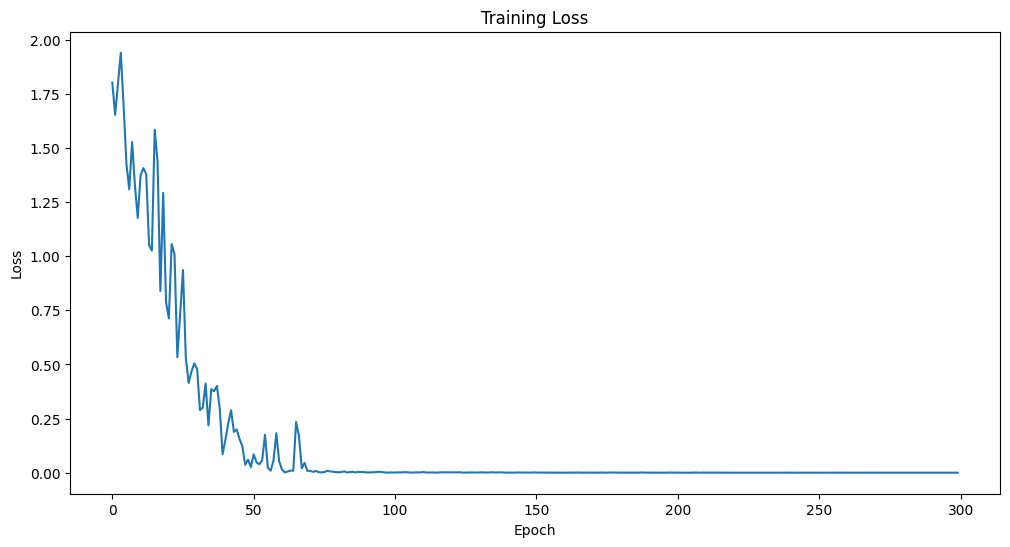

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import time

# Data loading
data_path = '../data-unversioned/p1ch7/'
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
])

cifar10 = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar10_val, batch_size=64, shuffle=False)

# Neural Network with additional hidden layers
model = nn.Sequential(
    nn.Linear(3072, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 128),
    nn.Tanh(),
    nn.Linear(128, 10),
    nn.LogSoftmax(dim=1)
)

# Training
learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 300

training_losses = []

Training_start_time = time.time()

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    training_losses.append(float(loss))

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Training_end_time = time.time()

Total_time = Training_end_time - Training_start_time
print("Total training time: %fs" % Total_time)

# Training Accuracy
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Training Accuracy: %f" % (correct / total))


# Validation Accuracy
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Validation Accuracy: %f" % (correct / total))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(training_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
